# Simulation of User Preferences

In [1]:
import os
import pandas as pd
import numpy as np
from vigor import generate_graphs, nobre_predicates, predicates, compute_metrics, Predicate, VIGOR, label_graphs, learn_predicates

## Generate graphs

1. Generate graphs using the fast_gnp_random_graph function from networkx
2. Calculate statistics for each graph

In [2]:
file_path = '../data/generated_graphs_example.csv'
# graphs = generate_graphs(100, 2, 200, file_path=file_path)

graphs = pd.read_csv(f'{file_path}')

In [3]:
graphs.head()

,graph_type,is_directed_int,has_spatial_attributes,has_temporal_attributes,is_bipartite,n_components,avg_betweenness_centrality,avg_closeness_centrality,avg_eigenvector_centrality,avg_degree,...,2.129032258064516,62,3.1,10.1,0.2,0.28239026969857217,3.2,1.2,1.3,4
0,4,1,1,0,0,6,0.004762,0.596901,0.082760,46.305556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,0,0,0,0,3,0.008252,0.574299,0.102541,23.608696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1,0,1,0,2,0.016667,0.155556,0.284518,0.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,0,0,1,2,0.006020,0.582964,0.089947,34.049587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,0,0,0,0,0.166667,0.750000,0.500000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
graphs = graphs[['graph_type', 'n_nodes', 'density']]

In [12]:
graphs

,n_nodes,density,graph_type_4,graph_type_2,graph_type_3,graph_type_1
0,144,0.323815,1,0,0,0
1,92,0.259436,1,0,0,0
2,6,0.133333,1,0,0,0
3,121,0.283747,1,0,0,0
4,4,0.666667,0,1,0,0
...,...,...,...,...,...,...
107,144,0.123252,1,0,0,0
108,151,0.014834,0,0,1,0
109,25,0.370000,1,0,0,0
110,43,0.046512,0,0,0,1


## Sample designers

We evaluate the ability of VIGOR to recover the rules that were used to represent simulated users. We design 3 versions of this simulated user: bob_informed, who follows the rules 100\% of the time; bob_semi_informed, who follows the rules 75\% of the time and chooses other visualizations randomly the other 25\% of the time; and bob_uninformed who follows the rules 50\% of the time and chooses other visualizations randomly the other 50\% of the time.

In [13]:
informed = label_graphs(graphs, predicates, conformance=1)
semi_informed = label_graphs(graphs, predicates, conformance=0.75)
uninformed = label_graphs(graphs, predicates, conformance=0.5)

In [14]:
informed

0        MATRIX
1        MATRIX
2        MATRIX
3        MATRIX
4        MATRIX
         ...   
107     PAOHVIS
108    NODELINK
109      MATRIX
110    NODELINK
111     PAOHVIS
Length: 112, dtype: object

### Learning predicates from labeled data

In [10]:
graphs['graph_type'].value_counts()

KeyError: 'graph_type'

In [11]:
graph_types = graphs['graph_type'].unique()
graphs['graph_type_' + pd.Series(graph_types).astype(str)] = (graphs['graph_type'].values[None] == graph_types[:,None]).astype(int).T
graphs = graphs.drop('graph_type', axis=1)

KeyError: 'graph_type'

In [15]:
learned_predicates_informed = learn_predicates(graphs, informed, 1000)
learned_predicates_semi_informed = learn_predicates(graphs, semi_informed, 1000)
learned_predicates_uninformed = learn_predicates(graphs, uninformed, 1000)

Learning predicates for MATRIX
[   0] loss 4.757489204406738
[ 100] loss 3.5877881050109863
[ 200] loss 2.48966646194458
[ 300] loss 2.088794708251953
[ 400] loss 1.8953744173049927
[ 500] loss 1.712381362915039
[ 600] loss 1.5300674438476562
[ 700] loss 1.3448723554611206
[ 800] loss 1.1520721912384033
[ 900] loss 0.9408893585205078
[   0] loss 7.163367748260498
[ 100] loss 6.675263404846191
[ 200] loss 5.96682596206665
[ 300] loss 5.112761497497559
[ 400] loss 4.613224506378174
[ 500] loss 4.141921043395996
[ 600] loss 3.66914701461792
[ 700] loss 3.172522783279419
[ 800] loss 2.626098871231079
[ 900] loss 1.963696837425232
Learning predicates for PAOHVIS
[   0] loss 3.5218679904937744
[ 100] loss 2.8402771949768066
[ 200] loss 2.4629032611846924
[ 300] loss 2.160457134246826
[ 400] loss 1.98149573802948
[ 500] loss 1.7983282804489136
[ 600] loss 1.6046491861343384
[ 700] loss 1.40073561668396
[ 800] loss 1.1785222291946411
[ 900] loss 0.9219292402267456
[   0] loss 9.359519958496094

### Comparing learned predicates to initial predicates

#### Informed User

In [16]:
evaluation_informed = compute_metrics(predicates, learned_predicates_informed)
print(evaluation_informed)

{'MATRIX': {'density': {'iou': 0.07153206321234519, 'deviation': 0.4178105715544447, 'inclusion': 1}}, 'PAOHVIS': {'density': {'iou': 0.0, 'deviation': 0.13000570212259016, 'inclusion': 1}, 'n_nodes': {'iou': 0.11555555555406831, 'deviation': 199.00000000033464, 'inclusion': 1}}, 'NODELINK': {}}


#### Semi-Informed User

In [17]:
evaluation_semi_informed = compute_metrics(predicates, learned_predicates_semi_informed)
print(evaluation_semi_informed)

{np.str_('NODETRIX'): {'density': {'iou': 0.14116208783872916, 'deviation': 0.17176758243225415, 'inclusion': 1}}, 'MATRIX': {'density': {'iou': 0.07153206321234519, 'deviation': 0.4178105715544447, 'inclusion': 1}}, np.str_('NODELINK'): {}, 'PAOHVIS': {}, np.str_('TREEMAP'): {'graph_type_1': {'iou': 0.0, 'deviation': 0.75, 'inclusion': 0}}, np.str_('CHORD_DIAGRAM'): {}}


#### Unformed User

In [18]:
evaluation_uninformed = compute_metrics(predicates, learned_predicates_uninformed)
print(evaluation_uninformed)

{'MATRIX': {}, np.str_('TREEMAP'): {'graph_type_1': {'iou': 0.0, 'deviation': 0.75, 'inclusion': 0}}, np.str_('NODELINK'): {}, np.str_('NODETRIX'): {}, 'PAOHVIS': {}, np.str_('CHORD_DIAGRAM'): {}}


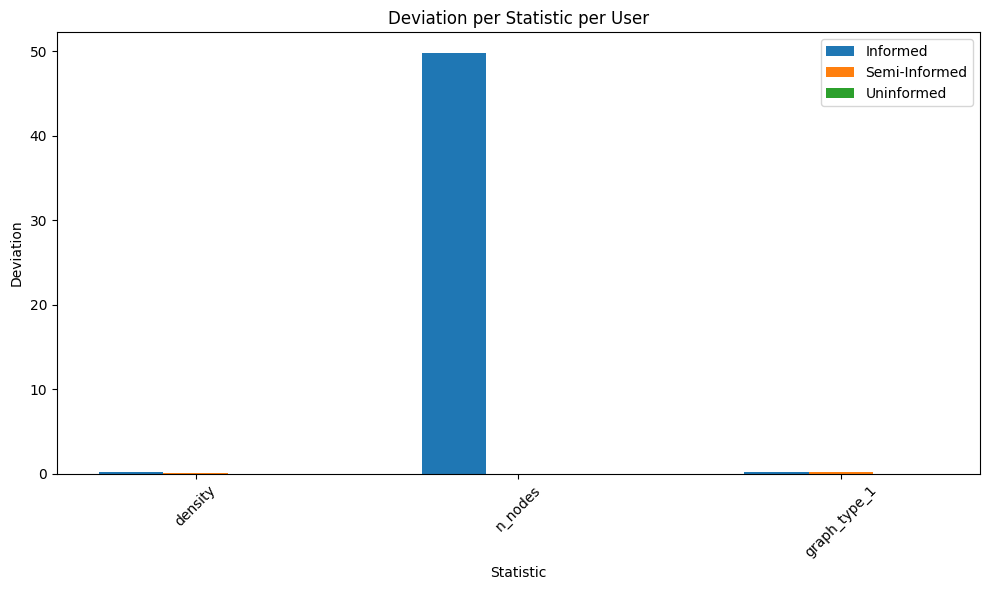

In [19]:
import matplotlib.pyplot as plt
from collections import defaultdict

results = [evaluation_informed, evaluation_semi_informed, evaluation_uninformed]

# Flatten the data for plotting
def extract_deviations(results):
    deviations = defaultdict(lambda: defaultdict(list))
    for user, user_data in enumerate(results):
        for vis_type, vis_data in user_data.items():
            for stat, stat_data in vis_data.items():
                if 'deviation' in stat_data:
                    deviations[stat][vis_type].append(stat_data['deviation'])
    return deviations

deviations = extract_deviations(results)

stat_names = list(deviations.keys())
visualization_types = list(set(v for vis_dict in deviations.values() for v in vis_dict.keys()))  # All unique visualization types

# Use these custom labels instead of "User 1", "User 2", "User 3"
user_labels = ['Informed', 'Semi-Informed', 'Uninformed']

bar_width = 0.2
index = np.arange(len(stat_names))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each "user" (informed, semi-informed, uninformed)
for i, user in enumerate(user_labels):
    deviation_values = []
    for stat in stat_names:
        user_devs = []
        for vis_type in visualization_types:
            if len(deviations[stat][vis_type]) > i:
                user_devs.append(deviations[stat][vis_type][i])
            else:
                user_devs.append(0)  # Fill with 0 if the user does not have this visualization type
        deviation_values.append(np.mean(user_devs))  # Average deviation for each statistic

    ax.bar(index + i * bar_width, deviation_values, bar_width, label=user)

# Labeling the axes and the chart
ax.set_xlabel('Statistic')
ax.set_ylabel('Deviation')
ax.set_title('Deviation per Statistic per User')
ax.set_xticks(index + bar_width * (len(user_labels) - 1) / 2)
ax.set_xticklabels(stat_names, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()